In [1]:
import config                     # author's personal configuration. Please remove and use your own preferences

%matplotlib inline                

In [2]:
import survey_model as survey
from IFCAPOL_catalogue   import blind_survey,non_blind_survey
import astropy.units as u   
from astropy.table       import Column,Table,vstack
from myutils             import table2skycoord, coord2healpix

In [3]:
import healpy as hp
import numpy as np

map = hp.read_map('/Users/mlopezca/LITEBIRD/Source_Extractor/Data/LB_LFT_L1-040_binned_cmb_fg_wn_1f_100mHz_0000.fits')
mask=map*0 + 1

In [4]:
LBdir    = '/Users/mlopezca/LITEBIRD/Source_Extractor/'    # main LiteBIRD directory (local)
src_dir  = LBdir+'Src/'                # code folder


In [24]:
IMO = np.load(src_dir+'instrument_LB_IMOv1.npy', allow_pickle=True).item()
print(IMO)
#print IMO['beam']


{'LB_LFT_40': {'freq': 40.0, 'freq_band': 12.0, 'beam': 70.5, 'P_sens': 37.42}, 'LB_LFT_50': {'freq': 50.0, 'freq_band': 15.0, 'beam': 58.5, 'P_sens': 33.46}, 'LB_LFT_60': {'freq': 60.0, 'freq_band': 14.0, 'beam': 51.1, 'P_sens': 21.31}, 'LB_LFT_68a': {'freq': 68.0, 'freq_band': 16.0, 'beam': 41.6, 'P_sens': 19.91}, 'LB_LFT_68b': {'freq': 68.0, 'freq_band': 16.0, 'beam': 47.1, 'P_sens': 31.76}, 'LB_LFT_78a': {'freq': 78.0, 'freq_band': 18.0, 'beam': 36.9, 'P_sens': 15.56}, 'LB_LFT_78b': {'freq': 78.0, 'freq_band': 18.0, 'beam': 43.8, 'P_sens': 19.14}, 'LB_LFT_89a': {'freq': 89.0, 'freq_band': 20.0, 'beam': 33.0, 'P_sens': 12.28}, 'LB_LFT_89b': {'freq': 89.0, 'freq_band': 20.0, 'beam': 41.5, 'P_sens': 28.77}, 'LB_LFT_100': {'freq': 100.0, 'freq_band': 23.0, 'beam': 30.2, 'P_sens': 10.34}, 'LB_LFT_119': {'freq': 119.0, 'freq_band': 36.0, 'beam': 26.3, 'P_sens': 7.69}, 'LB_LFT_140': {'freq': 140.0, 'freq_band': 42.0, 'beam': 23.7, 'P_sens': 7.24}, 'LB_MFT_100': {'freq': 100.0, 'freq_band'

In [29]:
IMO = np.load(src_dir+'instrument_LB_IMOv1.npy', allow_pickle=True).item()
print(IMO)


{'LB_LFT_40': {'freq': 40.0, 'freq_band': 12.0, 'beam': 70.5, 'P_sens': 37.42}, 'LB_LFT_50': {'freq': 50.0, 'freq_band': 15.0, 'beam': 58.5, 'P_sens': 33.46}, 'LB_LFT_60': {'freq': 60.0, 'freq_band': 14.0, 'beam': 51.1, 'P_sens': 21.31}, 'LB_LFT_68a': {'freq': 68.0, 'freq_band': 16.0, 'beam': 41.6, 'P_sens': 19.91}, 'LB_LFT_68b': {'freq': 68.0, 'freq_band': 16.0, 'beam': 47.1, 'P_sens': 31.76}, 'LB_LFT_78a': {'freq': 78.0, 'freq_band': 18.0, 'beam': 36.9, 'P_sens': 15.56}, 'LB_LFT_78b': {'freq': 78.0, 'freq_band': 18.0, 'beam': 43.8, 'P_sens': 19.14}, 'LB_LFT_89a': {'freq': 89.0, 'freq_band': 20.0, 'beam': 33.0, 'P_sens': 12.28}, 'LB_LFT_89b': {'freq': 89.0, 'freq_band': 20.0, 'beam': 41.5, 'P_sens': 28.77}, 'LB_LFT_100': {'freq': 100.0, 'freq_band': 23.0, 'beam': 30.2, 'P_sens': 10.34}, 'LB_LFT_119': {'freq': 119.0, 'freq_band': 36.0, 'beam': 26.3, 'P_sens': 7.69}, 'LB_LFT_140': {'freq': 140.0, 'freq_band': 42.0, 'beam': 23.7, 'P_sens': 7.24}, 'LB_MFT_100': {'freq': 100.0, 'freq_band'

In [45]:
for key, value in IMO.items():
    if key != 'vinDecode':
        print(f'{key}={value}')

LB_LFT_40={'freq': 40.0, 'freq_band': 12.0, 'beam': 70.5, 'P_sens': 37.42}
LB_LFT_50={'freq': 50.0, 'freq_band': 15.0, 'beam': 58.5, 'P_sens': 33.46}
LB_LFT_60={'freq': 60.0, 'freq_band': 14.0, 'beam': 51.1, 'P_sens': 21.31}
LB_LFT_68a={'freq': 68.0, 'freq_band': 16.0, 'beam': 41.6, 'P_sens': 19.91}
LB_LFT_68b={'freq': 68.0, 'freq_band': 16.0, 'beam': 47.1, 'P_sens': 31.76}
LB_LFT_78a={'freq': 78.0, 'freq_band': 18.0, 'beam': 36.9, 'P_sens': 15.56}
LB_LFT_78b={'freq': 78.0, 'freq_band': 18.0, 'beam': 43.8, 'P_sens': 19.14}
LB_LFT_89a={'freq': 89.0, 'freq_band': 20.0, 'beam': 33.0, 'P_sens': 12.28}
LB_LFT_89b={'freq': 89.0, 'freq_band': 20.0, 'beam': 41.5, 'P_sens': 28.77}
LB_LFT_100={'freq': 100.0, 'freq_band': 23.0, 'beam': 30.2, 'P_sens': 10.34}
LB_LFT_119={'freq': 119.0, 'freq_band': 36.0, 'beam': 26.3, 'P_sens': 7.69}
LB_LFT_140={'freq': 140.0, 'freq_band': 42.0, 'beam': 23.7, 'P_sens': 7.24}
LB_MFT_100={'freq': 100.0, 'freq_band': 23.0, 'beam': 37.8, 'P_sens': 8.48}
LB_MFT_119={'f

In [81]:
channels=(list(IMO))
print(channels)
print(IMO['LB_LFT_40'])
#print(IMO['LB_LFT_40']['beam'])

beams=[]
ind = 0
while ind < 22:
    beams.append (IMO[channels[ind]]['beam'])
    ind += 1

print(beams)
#beams_imo=IMO['LB_LFT_40']['beam']

['LB_LFT_40', 'LB_LFT_50', 'LB_LFT_60', 'LB_LFT_68a', 'LB_LFT_68b', 'LB_LFT_78a', 'LB_LFT_78b', 'LB_LFT_89a', 'LB_LFT_89b', 'LB_LFT_100', 'LB_LFT_119', 'LB_LFT_140', 'LB_MFT_100', 'LB_MFT_119', 'LB_MFT_140', 'LB_MFT_166', 'LB_MFT_195', 'LB_HFT_195', 'LB_HFT_235', 'LB_HFT_280', 'LB_HFT_337', 'LB_HFT_402']
{'freq': 40.0, 'freq_band': 12.0, 'beam': 70.5, 'P_sens': 37.42}
[70.5, 58.5, 51.1, 41.6, 47.1, 36.9, 43.8, 33.0, 41.5, 30.2, 26.3, 23.7, 37.8, 33.6, 30.8, 28.9, 28.0, 28.6, 24.7, 22.5, 20.9, 17.9]


In [98]:
catalogos =[
'blind_cat_H3_402_after_cleaned',
'blind_cat_H2_337_after_cleaned',
'blind_cat_H1_195_after_cleaned',
'blind_cat_H1_280_after_cleaned',
'blind_cat_H2_235_after_cleaned',
'blind_cat_L1_40_after_cleaned',
'blind_cat_L1_60_after_cleaned',
'blind_cat_L1_78a_after_cleaned',
'blind_cat_L2_50_after_cleaned',
'blind_cat_L2_68a_after_cleaned',
'blind_cat_L2_89a_after_cleaned',
'blind_cat_L3_119_after_cleaned',
'blind_cat_L3_68b_after_cleaned',
'blind_cat_L3_89b_after_cleaned',
'blind_cat_L4_100_after_cleaned',
'blind_cat_L4_140_after_cleaned',
'blind_cat_L4_78a_after_cleaned',
'blind_cat_M1_100_after_cleaned',
'blind_cat_M1_140_after_cleaned',
'blind_cat_M1_195_after_cleaned',
'blind_cat_M2_119_after_cleaned',
'blind_cat_M2_166_after_cleaned']

In [102]:
print(catalogos)
#cats=catalogos.reverse()
#cats=list(reversed(catalogos));
cats = catalogos[::-1] #reversing using list slicing

['blind_cat_H3_402_after_cleaned', 'blind_cat_H2_337_after_cleaned', 'blind_cat_H1_195_after_cleaned', 'blind_cat_H1_280_after_cleaned', 'blind_cat_H2_235_after_cleaned', 'blind_cat_L1_40_after_cleaned', 'blind_cat_L1_60_after_cleaned', 'blind_cat_L1_78a_after_cleaned', 'blind_cat_L2_50_after_cleaned', 'blind_cat_L2_68a_after_cleaned', 'blind_cat_L2_89a_after_cleaned', 'blind_cat_L3_119_after_cleaned', 'blind_cat_L3_68b_after_cleaned', 'blind_cat_L3_89b_after_cleaned', 'blind_cat_L4_100_after_cleaned', 'blind_cat_L4_140_after_cleaned', 'blind_cat_L4_78a_after_cleaned', 'blind_cat_M1_100_after_cleaned', 'blind_cat_M1_140_after_cleaned', 'blind_cat_M1_195_after_cleaned', 'blind_cat_M2_119_after_cleaned', 'blind_cat_M2_166_after_cleaned']


In [104]:
print(cats)

['blind_cat_M2_166_after_cleaned', 'blind_cat_M2_119_after_cleaned', 'blind_cat_M1_195_after_cleaned', 'blind_cat_M1_140_after_cleaned', 'blind_cat_M1_100_after_cleaned', 'blind_cat_L4_78a_after_cleaned', 'blind_cat_L4_140_after_cleaned', 'blind_cat_L4_100_after_cleaned', 'blind_cat_L3_89b_after_cleaned', 'blind_cat_L3_68b_after_cleaned', 'blind_cat_L3_119_after_cleaned', 'blind_cat_L2_89a_after_cleaned', 'blind_cat_L2_68a_after_cleaned', 'blind_cat_L2_50_after_cleaned', 'blind_cat_L1_78a_after_cleaned', 'blind_cat_L1_60_after_cleaned', 'blind_cat_L1_40_after_cleaned', 'blind_cat_H2_235_after_cleaned', 'blind_cat_H1_280_after_cleaned', 'blind_cat_H1_195_after_cleaned', 'blind_cat_H2_337_after_cleaned', 'blind_cat_H3_402_after_cleaned']


In [82]:
print(len(catalogos))

22


In [108]:
index = 0
cat_filename=[]
map_name_masked=[]
map_name_masked_png=[]

temp='/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/'+catalogos[index]+'.fits'
while index < len(catalogos):
    cat_filename.append ('/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/'+catalogos[index]+'.fits')
    map_name_masked.append ('/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/'+'mask_'+catalogos[index]+'_v2.fits')
    map_name_masked_png.append ('/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/'+'mask_'+catalogos[index]+'_v2.png')
    index += 1

#print(cat_filename)
#print(map_name_masked)
print(catalogos)

['blind_cat_H3_402_after_cleaned', 'blind_cat_H2_337_after_cleaned', 'blind_cat_H1_195_after_cleaned', 'blind_cat_H1_280_after_cleaned', 'blind_cat_H2_235_after_cleaned', 'blind_cat_L1_40_after_cleaned', 'blind_cat_L1_60_after_cleaned', 'blind_cat_L1_78a_after_cleaned', 'blind_cat_L2_50_after_cleaned', 'blind_cat_L2_68a_after_cleaned', 'blind_cat_L2_89a_after_cleaned', 'blind_cat_L3_119_after_cleaned', 'blind_cat_L3_68b_after_cleaned', 'blind_cat_L3_89b_after_cleaned', 'blind_cat_L4_100_after_cleaned', 'blind_cat_L4_140_after_cleaned', 'blind_cat_L4_78a_after_cleaned', 'blind_cat_M1_100_after_cleaned', 'blind_cat_M1_140_after_cleaned', 'blind_cat_M1_195_after_cleaned', 'blind_cat_M2_119_after_cleaned', 'blind_cat_M2_166_after_cleaned']


In [9]:
index = 0
while index < len(cat_filename):
    tabla= Table.read(cat_filename[index])
    print(catalogos[index],len(tabla))
    index +=1

blind_cat_H3_402_after_cleaned 11276
blind_cat_H2_337_after_cleaned 8103
blind_cat_H1_195_after_cleaned 3200
blind_cat_H1_280_after_cleaned 6193
blind_cat_H2_235_after_cleaned 4533
blind_cat_L1_40_after_cleaned 327
blind_cat_L1_60_after_cleaned 389
blind_cat_L1_78a_after_cleaned 593
blind_cat_L2_50_after_cleaned 354
blind_cat_L2_68a_after_cleaned 522
blind_cat_L2_89a_after_cleaned 675
blind_cat_L3_119_after_cleaned 4831
blind_cat_L3_68b_after_cleaned 386
blind_cat_L3_89b_after_cleaned 410
blind_cat_L4_100_after_cleaned 4654
blind_cat_L4_140_after_cleaned 5018
blind_cat_L4_78a_after_cleaned 521
blind_cat_M1_100_after_cleaned 504
blind_cat_M1_140_after_cleaned 3012
blind_cat_M1_195_after_cleaned 3385
blind_cat_M2_119_after_cleaned 2960
blind_cat_M2_166_after_cleaned 3201


In [124]:
for key, value in IMO.items():
    if key != 'vinDecode':
        print(f'{key}={value}')

LB_LFT_40={'freq': 40.0, 'freq_band': 12.0, 'beam': 70.5, 'P_sens': 37.42}
LB_LFT_50={'freq': 50.0, 'freq_band': 15.0, 'beam': 58.5, 'P_sens': 33.46}
LB_LFT_60={'freq': 60.0, 'freq_band': 14.0, 'beam': 51.1, 'P_sens': 21.31}
LB_LFT_68a={'freq': 68.0, 'freq_band': 16.0, 'beam': 41.6, 'P_sens': 19.91}
LB_LFT_68b={'freq': 68.0, 'freq_band': 16.0, 'beam': 47.1, 'P_sens': 31.76}
LB_LFT_78a={'freq': 78.0, 'freq_band': 18.0, 'beam': 36.9, 'P_sens': 15.56}
LB_LFT_78b={'freq': 78.0, 'freq_band': 18.0, 'beam': 43.8, 'P_sens': 19.14}
LB_LFT_89a={'freq': 89.0, 'freq_band': 20.0, 'beam': 33.0, 'P_sens': 12.28}
LB_LFT_89b={'freq': 89.0, 'freq_band': 20.0, 'beam': 41.5, 'P_sens': 28.77}
LB_LFT_100={'freq': 100.0, 'freq_band': 23.0, 'beam': 30.2, 'P_sens': 10.34}
LB_LFT_119={'freq': 119.0, 'freq_band': 36.0, 'beam': 26.3, 'P_sens': 7.69}
LB_LFT_140={'freq': 140.0, 'freq_band': 42.0, 'beam': 23.7, 'P_sens': 7.24}
LB_MFT_100={'freq': 100.0, 'freq_band': 23.0, 'beam': 37.8, 'P_sens': 8.48}
LB_MFT_119={'f

In [142]:
names = ['blind_cat_H3_402_after_cleaned', 'blind_cat_H2_337_after_cleaned', 'blind_cat_H1_195_after_cleaned', 'blind_cat_H1_280_after_cleaned', 'blind_cat_H2_235_after_cleaned', 
         'blind_cat_L1_40_after_cleaned', 'blind_cat_L1_60_after_cleaned', 'blind_cat_L1_78a_after_cleaned', 'blind_cat_L2_50_after_cleaned', 'blind_cat_L2_68a_after_cleaned', 
         'blind_cat_L2_89a_after_cleaned', 'blind_cat_L3_119_after_cleaned', 'blind_cat_L3_68b_after_cleaned', 'blind_cat_L3_89b_after_cleaned', 'blind_cat_L4_100_after_cleaned', 
         'blind_cat_L4_140_after_cleaned', 'blind_cat_L4_78a_after_cleaned', 'blind_cat_M1_100_after_cleaned', 'blind_cat_M1_140_after_cleaned', 'blind_cat_M1_195_after_cleaned', 
         'blind_cat_M2_119_after_cleaned', 'blind_cat_M2_166_after_cleaned']
print(names)

beams_ord = np.array([17.9 , 20.9 , 28.6 , 22.5 , 24.7 , 70.5 , 51.1, 36.9 , 58.5 , 41.6 , 33.0 , 26.3 , 47.1 , 41.5 , 30.2 , 23.7 , 36.9 , 37.8 , 30.8 , 28.0 , 33.6 , 28.9])
print(beams_ord)

['blind_cat_H3_402_after_cleaned', 'blind_cat_H2_337_after_cleaned', 'blind_cat_H1_195_after_cleaned', 'blind_cat_H1_280_after_cleaned', 'blind_cat_H2_235_after_cleaned', 'blind_cat_L1_40_after_cleaned', 'blind_cat_L1_60_after_cleaned', 'blind_cat_L1_78a_after_cleaned', 'blind_cat_L2_50_after_cleaned', 'blind_cat_L2_68a_after_cleaned', 'blind_cat_L2_89a_after_cleaned', 'blind_cat_L3_119_after_cleaned', 'blind_cat_L3_68b_after_cleaned', 'blind_cat_L3_89b_after_cleaned', 'blind_cat_L4_100_after_cleaned', 'blind_cat_L4_140_after_cleaned', 'blind_cat_L4_78a_after_cleaned', 'blind_cat_M1_100_after_cleaned', 'blind_cat_M1_140_after_cleaned', 'blind_cat_M1_195_after_cleaned', 'blind_cat_M2_119_after_cleaned', 'blind_cat_M2_166_after_cleaned']
[17.9 20.9 28.6 22.5 24.7 70.5 51.1 36.9 58.5 41.6 33.  26.3 47.1 41.5
 30.2 23.7 36.9 37.8 30.8 28.  33.6 28.9]


In [157]:
radio_radians = beams_ord * np.pi /60 /180
print(radio_radians)
print(len(beams_ord))

[0.0052069  0.00607956 0.0083194  0.00654498 0.00718494 0.02050762
 0.01486439 0.01073377 0.01701696 0.01210095 0.00959931 0.00765036
 0.01370083 0.01207186 0.00878482 0.00689405 0.01073377 0.01099557
 0.00895936 0.00814487 0.00977384 0.00840667]
22


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_H3_402_after_cleaned.fits  =  11276  beam = 17.9


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_H2_337_after_cleaned.fits  =  8103  beam = 20.9


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_H1_195_after_cleaned.fits  =  3200  beam = 28.6


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_H1_280_after_cleaned.fits  =  6193  beam = 22.5


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_H2_235_after_cleaned.fits  =  4533  beam = 24.7


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L1_40_after_cleaned.fits  =  327  beam = 70.5


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L1_60_after_cleaned.fits  =  389  beam = 51.1


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L1_78a_after_cleaned.fits  =  593  beam = 36.9


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L2_50_after_cleaned.fits  =  354  beam = 58.5


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L2_68a_after_cleaned.fits  =  522  beam = 41.6


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L2_89a_after_cleaned.fits  =  675  beam = 33.0


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L3_119_after_cleaned.fits  =  4831  beam = 26.3


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L3_68b_after_cleaned.fits  =  386  beam = 47.1


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L3_89b_after_cleaned.fits  =  410  beam = 41.5


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L4_100_after_cleaned.fits  =  4654  beam = 30.2


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L4_140_after_cleaned.fits  =  5018  beam = 23.7


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_L4_78a_after_cleaned.fits  =  521  beam = 36.9


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_M1_100_after_cleaned.fits  =  504  beam = 37.8


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_M1_140_after_cleaned.fits  =  3012  beam = 30.8


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_M1_195_after_cleaned.fits  =  3385  beam = 28.0


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_M2_119_after_cleaned.fits  =  2960  beam = 33.6


setting the output map dtype to [dtype('float32')]


/Users/mlopezca/LITEBIRD/Source_Extractor/Catalogs/Output/blind_cat_M2_166_after_cleaned.fits  =  3201  beam = 28.9


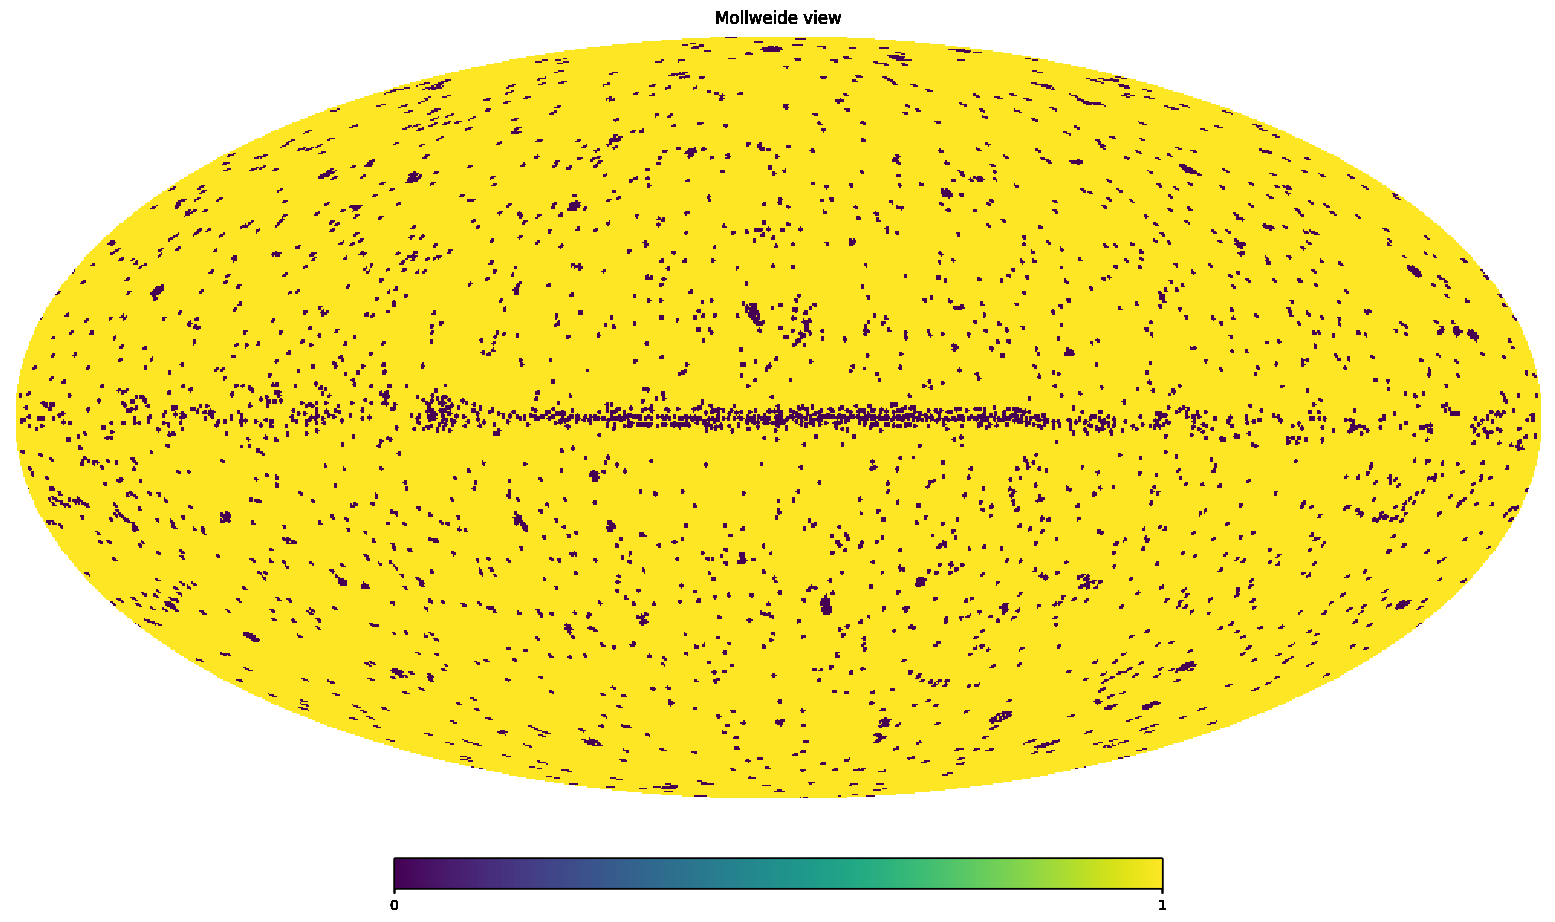

In [158]:
import matplotlib.pyplot as plot

index = 0
while index < 22:
    
    mask=map*0 + 1
    tabla= Table.read(cat_filename[index])
    skycoords = table2skycoord(tabla)
    coords_healpix = coord2healpix(512,skycoords,coordsys='G',nested=False)
    print(cat_filename[index],' = ',len(coords_healpix),' beam =',beams_ord[index])

    for x in coords_healpix:
        vec = hp.pix2vec(512, x)
    #    ipix_disc = hp.query_disc(nside=512, vec=vec, radius=np.radians(1.0))
        ipix_disc = hp.query_disc(nside=512, vec=vec, radius=radio_radians[index])
        mask[ipix_disc]=0
        
    hp.write_map(map_name_masked[index], mask, overwrite=True)
    plot.figure(1,figsize=(16,12))
    hp.mollview(mask,fig=1,xsize=1000) 
    plot.savefig(map_name_masked_png[index],dpi=1000)
    index +=1
    

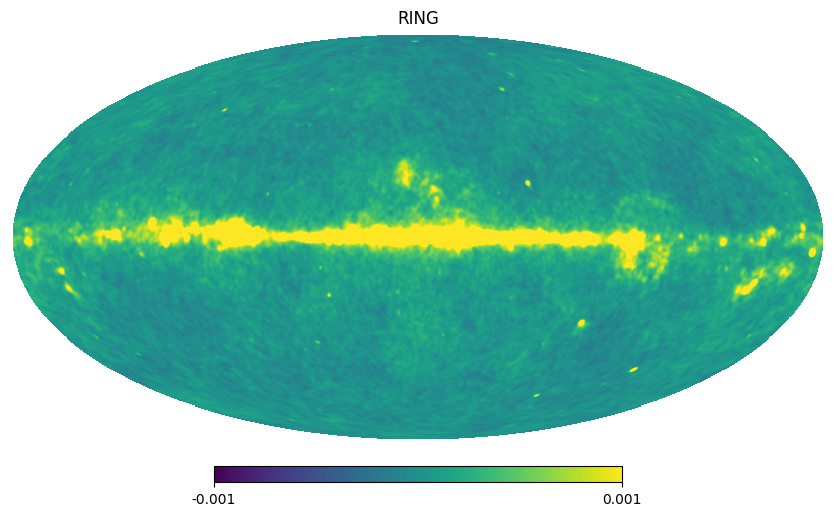

In [345]:
hp.mollview(map, title="RING", min=-0.001, max=0.001)